# Downloading and Merging Data

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

In [3]:
power_usage_url = "https://www.kaggle.com/srinuti/residential-power-usage-3years-data-timeseries?select=power_usage_2016_to_2020.csv"
weather_url = "https://www.kaggle.com/srinuti/residential-power-usage-3years-data-timeseries?select=weather_2016_2020_daily.csv"

In [4]:
od.download(power_usage_url)
od.download(weather_url)

Skipping, found downloaded files in "./residential-power-usage-3years-data-timeseries" (use force=True to force download)
Skipping, found downloaded files in "./residential-power-usage-3years-data-timeseries" (use force=True to force download)


In [5]:
import os
data_dir = "./residential-power-usage-3years-data-timeseries"
os.listdir(data_dir)

['weather_2016_2020_daily.csv', 'power_usage_2016_to_2020.csv']

In [6]:
power_usage_csv = data_dir + "/power_usage_2016_to_2020.csv"
weather_csv = data_dir + "/weather_2016_2020_daily.csv"

In [7]:
!pip install pandas --quiet

In [8]:
import pandas as pd
power_usage_df = pd.read_csv(power_usage_csv)
weather_df = pd.read_csv(weather_csv)

In [9]:
power_usage_df

,StartDate,Value (kWh),day_of_week,notes
0,2016-01-06 00:00:00,1.057,2,weekday
1,2016-01-06 01:00:00,1.171,2,weekday
2,2016-01-06 02:00:00,0.560,2,weekday
3,2016-01-06 03:00:00,0.828,2,weekday
4,2016-01-06 04:00:00,0.932,2,weekday
...,...,...,...,...
35947,2020-07-07 19:00:00,1.307,1,weekday
35948,2020-07-07 20:00:00,2.872,1,weekday
35949,2020-07-07 21:00:00,2.138,1,weekday
35950,2020-07-07 22:00:00,2.199,1,weekday


In [10]:
weather_df

,Date,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
0,2016-01-06,1,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.00,2
1,2016-02-06,2,76,71.2,66,74,70.3,66,100,96.8,89,18,7.8,0,29.8,29.8,29.7,4.33,5
2,2016-03-06,3,79,72.1,68,72,70.0,68,100,93.6,72,18,4.7,0,29.8,29.8,29.7,3.18,6
3,2016-04-06,4,76,71.2,69,73,70.0,66,100,96.1,85,20,7.0,0,29.8,29.7,29.7,2.37,2
4,2016-05-06,5,82,73.8,68,72,70.0,68,100,88.7,62,17,7.7,0,29.7,29.7,29.7,0.39,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,2020-08-26,26,95,83.4,79,79,75.7,73,94,78.2,54,21,12.4,8,29.7,29.7,29.6,0.01,2
1548,2020-08-27,27,99,87.1,78,75,72.0,69,82,62.7,39,14,8.0,0,29.7,29.6,29.5,0.00,3
1549,2020-08-28,28,98,86.5,79,79,77.2,74,94,75.6,49,18,8.1,0,29.8,29.7,29.7,0.00,4
1550,2020-08-29,29,98,87.5,79,79,75.8,72,94,70.4,43,15,6.5,0,29.8,29.7,29.7,0.22,5


In [11]:
n = power_usage_df.shape[0]
p1 = pd.Series(range(n), pd.period_range('2016-06-01 00:00:00', freq = '1H', periods = n))
power_usage_df['StartDate'] = p1.to_frame().index

power_usage_df['StartDate'] = power_usage_df['StartDate'].apply (lambda x: x.to_timestamp())
power_usage_df['Date'] = pd.DatetimeIndex(power_usage_df['StartDate']).date

In [12]:
power_usage_df

,StartDate,Value (kWh),day_of_week,notes,Date
0,2016-06-01 00:00:00,1.057,2,weekday,2016-06-01
1,2016-06-01 01:00:00,1.171,2,weekday,2016-06-01
2,2016-06-01 02:00:00,0.560,2,weekday,2016-06-01
3,2016-06-01 03:00:00,0.828,2,weekday,2016-06-01
4,2016-06-01 04:00:00,0.932,2,weekday,2016-06-01
...,...,...,...,...,...
35947,2020-07-07 19:00:00,1.307,1,weekday,2020-07-07
35948,2020-07-07 20:00:00,2.872,1,weekday,2020-07-07
35949,2020-07-07 21:00:00,2.138,1,weekday,2020-07-07
35950,2020-07-07 22:00:00,2.199,1,weekday,2020-07-07


In [13]:
power_usage_df1 = power_usage_df.groupby('Date').sum()

power_usage_df1['day_of_week'] = power_usage_df1['day_of_week'].apply(lambda x: x/24)

notes_col = power_usage_df.groupby('Date').first()['notes'].values
power_usage_df1['notes'] = notes_col

In [14]:
power_usage_df1

,Value (kWh),day_of_week,notes
Date,,,
2016-06-01,29.691,2.0,weekday
2016-06-02,28.789,5.0,weekend
2016-06-03,19.247,6.0,weekend
2016-06-04,22.883,2.0,weekday
2016-06-05,25.195,4.0,weekday
...,...,...,...
2020-07-03,39.659,5.0,COVID_lockdown
2020-07-04,38.071,1.0,COVID_lockdown
2020-07-05,36.565,3.0,COVID_lockdown


In [15]:
m = weather_df.shape[0]
p2 = pd.Series(range(m), pd.period_range('2016-06-01', freq = '1D', periods = m))
weather_df['Date'] = p2.to_frame().index

weather_df['Date'] = weather_df['Date'].apply (lambda x: x.to_timestamp())

In [16]:
weather_df

,Date,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week
0,2016-06-01,1,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.00,2
1,2016-06-02,2,76,71.2,66,74,70.3,66,100,96.8,89,18,7.8,0,29.8,29.8,29.7,4.33,5
2,2016-06-03,3,79,72.1,68,72,70.0,68,100,93.6,72,18,4.7,0,29.8,29.8,29.7,3.18,6
3,2016-06-04,4,76,71.2,69,73,70.0,66,100,96.1,85,20,7.0,0,29.8,29.7,29.7,2.37,2
4,2016-06-05,5,82,73.8,68,72,70.0,68,100,88.7,62,17,7.7,0,29.7,29.7,29.7,0.39,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1547,2020-08-26,26,95,83.4,79,79,75.7,73,94,78.2,54,21,12.4,8,29.7,29.7,29.6,0.01,2
1548,2020-08-27,27,99,87.1,78,75,72.0,69,82,62.7,39,14,8.0,0,29.7,29.6,29.5,0.00,3
1549,2020-08-28,28,98,86.5,79,79,77.2,74,94,75.6,49,18,8.1,0,29.8,29.7,29.7,0.00,4
1550,2020-08-29,29,98,87.5,79,79,75.8,72,94,70.4,43,15,6.5,0,29.8,29.7,29.7,0.22,5


In [17]:
df_temp = power_usage_df1['Value (kWh)'].values
k = power_usage_df1.shape[0]
df = weather_df[0:k]
df['kWh_usage'] = pd.Series(df_temp).to_frame()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [18]:
df_temp = power_usage_df1['notes'].values
df['tags'] = pd.Series(df_temp).to_frame()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
df

,Date,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week,kWh_usage,tags
0,2016-06-01,1,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.00,2,29.691,weekday
1,2016-06-02,2,76,71.2,66,74,70.3,66,100,96.8,89,18,7.8,0,29.8,29.8,29.7,4.33,5,28.789,weekend
2,2016-06-03,3,79,72.1,68,72,70.0,68,100,93.6,72,18,4.7,0,29.8,29.8,29.7,3.18,6,19.247,weekend
3,2016-06-04,4,76,71.2,69,73,70.0,66,100,96.1,85,20,7.0,0,29.8,29.7,29.7,2.37,2,22.883,weekday
4,2016-06-05,5,82,73.8,68,72,70.0,68,100,88.7,62,17,7.7,0,29.7,29.7,29.7,0.39,4,25.195,weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,2020-07-03,3,96,84.7,74,76,72.8,67,91,69.6,38,24,6.3,0,29.9,29.9,29.8,0.00,5,39.659,COVID_lockdown
1494,2020-07-04,4,97,84.6,73,76,72.9,70,94,70.5,43,10,3.6,0,29.9,29.8,29.7,0.00,1,38.071,COVID_lockdown
1495,2020-07-05,5,95,85.4,79,75,73.5,68,88,69.0,44,12,6.2,0,29.8,29.7,29.7,0.00,3,36.565,COVID_lockdown
1496,2020-07-06,6,91,85.5,82,77,75.5,72,82,71.9,59,10,6.0,0,29.8,29.8,29.7,0.00,6,39.900,COVID_lockdown


# Exploratory Data Analysis

In [20]:
df.head()

,Date,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week,kWh_usage,tags
0,2016-06-01,1,85,74.8,68,74,71.4,66,100,89.4,65,21,9.5,0,29.8,29.8,29.7,0.00,2,29.691,weekday
1,2016-06-02,2,76,71.2,66,74,70.3,66,100,96.8,89,18,7.8,0,29.8,29.8,29.7,4.33,5,28.789,weekend
2,2016-06-03,3,79,72.1,68,72,70.0,68,100,93.6,72,18,4.7,0,29.8,29.8,29.7,3.18,6,19.247,weekend
3,2016-06-04,4,76,71.2,69,73,70.0,66,100,96.1,85,20,7.0,0,29.8,29.7,29.7,2.37,2,22.883,weekday
4,2016-06-05,5,82,73.8,68,72,70.0,68,100,88.7,62,17,7.7,0,29.7,29.7,29.7,0.39,4,25.195,weekday


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1498 non-null   datetime64[ns]
 1   Day          1498 non-null   int64         
 2   Temp_max     1498 non-null   int64         
 3   Temp_avg     1498 non-null   float64       
 4   Temp_min     1498 non-null   int64         
 5   Dew_max      1498 non-null   int64         
 6   Dew_avg      1498 non-null   float64       
 7   Dew_min      1498 non-null   int64         
 8   Hum_max      1498 non-null   int64         
 9   Hum_avg      1498 non-null   float64       
 10  Hum_min      1498 non-null   int64         
 11  Wind_max     1498 non-null   int64         
 12  Wind_avg     1498 non-null   float64       
 13  Wind_min     1498 non-null   int64         
 14  Press_max    1498 non-null   float64       
 15  Press_avg    1498 non-null   float64       
 16  Press_

In [22]:
df.isna().sum()

Date           0
Day            0
Temp_max       0
Temp_avg       0
Temp_min       0
Dew_max        0
Dew_avg        0
Dew_min        0
Hum_max        0
Hum_avg        0
Hum_min        0
Wind_max       0
Wind_avg       0
Wind_min       0
Press_max      0
Press_avg      0
Press_min      0
Precipit       0
day_of_week    0
kWh_usage      0
tags           0
dtype: int64

In [23]:
df.corr()

,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week,kWh_usage
Day,1.000000,0.005967,0.000755,-0.001977,0.002429,-0.000676,-0.006322,-0.003976,-0.005951,-0.017581,0.070071,0.048668,0.019761,-0.041066,-0.029535,0.026205,0.027902,-0.002588,-0.058705
Temp_max,0.005967,1.000000,0.970671,0.896819,0.853261,0.863508,0.834735,0.198014,0.009409,-0.115138,-0.017668,-0.233705,-0.222661,-0.641610,-0.538695,-0.041621,-0.034092,0.020255,0.710673
Temp_avg,0.000755,0.970671,1.000000,0.964856,0.907404,0.927545,0.902473,0.217103,0.105836,0.032589,0.029039,-0.142861,-0.135562,-0.681656,-0.577216,-0.065150,0.001527,0.019368,0.720178
Temp_min,-0.001977,0.896819,0.964856,1.000000,0.899193,0.937564,0.940381,0.221901,0.211626,0.165240,0.060535,-0.071067,-0.044836,-0.677092,-0.563582,-0.077089,0.045736,0.017839,0.705234
Dew_max,0.002429,0.853261,0.907404,0.899193,1.000000,0.970852,0.904039,0.489682,0.443943,0.334323,0.133957,-0.050420,-0.090190,-0.700926,-0.633840,-0.091189,0.075256,0.020858,0.606610
Dew_avg,-0.000676,0.863508,0.927545,0.937564,0.970852,1.000000,0.968535,0.470792,0.466556,0.365303,0.078595,-0.094989,-0.092529,-0.711440,-0.619705,-0.091366,0.073098,0.017325,0.634184
Dew_min,-0.006322,0.834735,0.902473,0.940381,0.904039,0.968535,1.000000,0.415608,0.437150,0.363220,0.026391,-0.126508,-0.090757,-0.682932,-0.560050,-0.085538,0.078316,0.009499,0.645126
Hum_max,-0.003976,0.198014,0.217103,0.221901,0.489682,0.470792,0.415608,1.000000,0.763141,0.511610,-0.011091,-0.176681,-0.197516,-0.306529,-0.305726,-0.081099,0.124446,-0.001444,0.100471
Hum_avg,-0.005951,0.009409,0.105836,0.211626,0.443943,0.466556,0.437150,0.763141,1.000000,0.892976,0.129289,0.061033,0.052982,-0.291884,-0.296509,-0.096077,0.203410,-0.000932,-0.022245
Hum_min,-0.017581,-0.115138,0.032589,0.165240,0.334323,0.365303,0.363220,0.511610,0.892976,1.000000,0.183170,0.230082,0.205318,-0.213014,-0.223464,-0.101636,0.215791,-0.003558,-0.075223


In [24]:
!pip install plotly matplotlib seaborn --quiet

In [25]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [26]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [27]:
fig = px.histogram(df, x='Temp_avg', 
                   marginal='box', 
                   title='Distribution of Avg Temp')
fig.update_layout(bargap=0.1)
fig.show()

Temperature distribution is not uniform. We have more warmer days than colder days. We also have very few data on days with temperature below 35. Median of Average-temperature lies at 73.8

In [28]:
fig = px.histogram(df, x='Dew_avg', 
                   marginal='box', 
                   title='Distribution of Avg Dew')
fig.update_layout(bargap=0.1)
fig.show()

In [29]:
fig = px.histogram(df, x='Hum_avg', 
                   marginal='box', 
                   title='Distribution of Avg Humidity')
fig.update_layout(bargap=0.1)
fig.show()

In [30]:
fig = px.histogram(df, x='Wind_avg', 
                   marginal='box', 
                   title='Distribution of Avg Wind')
fig.update_layout(bargap=0.1)
fig.show()

In [31]:
fig = px.histogram(df, x='Press_avg', 
                   marginal='box', 
                   title='Distribution of Avg Pressure')
fig.update_layout(bargap=0.1)
fig.show()

In [32]:
fig = px.histogram(df, x='Precipit', 
                   marginal='box', 
                   title='Distribution of Precipitation')
fig.update_layout(bargap=0.1)
fig.show()

# Imputing Missing Values

In [33]:
!pip install numpy --quiet

In [34]:
import numpy as np

In [35]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()[1:-2]
categorical_cols = df.select_dtypes('object').columns.tolist()

In [36]:
df[numeric_cols].describe()

,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit
count,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000
mean,80.786382,71.277236,62.888518,66.261015,61.734579,56.506676,92.624166,74.487517,51.401869,15.899866,7.769025,1.391188,29.977303,29.906142,29.814753,0.160067
std,12.652164,12.443023,13.493124,12.348885,13.685235,15.229231,7.748873,11.810572,15.718254,4.853153,3.007910,2.516049,0.167357,0.162033,0.787233,0.668120
min,34.000000,27.600000,19.000000,18.000000,13.200000,10.000000,50.000000,31.500000,15.000000,6.000000,1.600000,0.000000,29.500000,28.800000,0.000000,0.000000
25%,73.000000,62.900000,52.000000,60.250000,53.500000,45.000000,90.000000,67.500000,41.000000,13.000000,5.700000,0.000000,29.900000,29.800000,29.700000,0.000000
50%,83.000000,73.800000,67.000000,70.000000,65.950000,62.000000,94.000000,75.200000,50.000000,15.000000,7.300000,0.000000,29.900000,29.900000,29.800000,0.000000
75%,91.000000,81.600000,75.000000,76.000000,73.100000,70.000000,100.000000,82.800000,61.000000,18.000000,9.500000,3.000000,30.100000,30.000000,29.900000,0.020000
max,101.000000,90.000000,83.000000,83.000000,79.800000,78.000000,100.000000,99.900000,97.000000,39.000000,23.900000,17.000000,30.600000,30.600000,30.500000,13.430000


In [37]:
from sklearn.impute import SimpleImputer

In [38]:
imputer = SimpleImputer(strategy = 'mean')

In [39]:
imputer.fit(df[numeric_cols])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [40]:
list(imputer.statistics_)

[80.7863818424566,
 71.27723631508677,
 62.888518024032045,
 66.26101468624833,
 61.734579439252336,
 56.50667556742323,
 92.62416555407209,
 74.48751668891855,
 51.401869158878505,
 15.899866488651535,
 7.769025367156209,
 1.3911882510013351,
 29.977303070761014,
 29.906141522029372,
 29.81475300400534,
 0.16006675567423234]

# Scaling Numeric Columns

In [41]:
df[numeric_cols].describe()

,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit
count,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000
mean,80.786382,71.277236,62.888518,66.261015,61.734579,56.506676,92.624166,74.487517,51.401869,15.899866,7.769025,1.391188,29.977303,29.906142,29.814753,0.160067
std,12.652164,12.443023,13.493124,12.348885,13.685235,15.229231,7.748873,11.810572,15.718254,4.853153,3.007910,2.516049,0.167357,0.162033,0.787233,0.668120
min,34.000000,27.600000,19.000000,18.000000,13.200000,10.000000,50.000000,31.500000,15.000000,6.000000,1.600000,0.000000,29.500000,28.800000,0.000000,0.000000
25%,73.000000,62.900000,52.000000,60.250000,53.500000,45.000000,90.000000,67.500000,41.000000,13.000000,5.700000,0.000000,29.900000,29.800000,29.700000,0.000000
50%,83.000000,73.800000,67.000000,70.000000,65.950000,62.000000,94.000000,75.200000,50.000000,15.000000,7.300000,0.000000,29.900000,29.900000,29.800000,0.000000
75%,91.000000,81.600000,75.000000,76.000000,73.100000,70.000000,100.000000,82.800000,61.000000,18.000000,9.500000,3.000000,30.100000,30.000000,29.900000,0.020000
max,101.000000,90.000000,83.000000,83.000000,79.800000,78.000000,100.000000,99.900000,97.000000,39.000000,23.900000,17.000000,30.600000,30.600000,30.500000,13.430000


In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()

In [44]:
scaler.fit(df[numeric_cols])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [45]:
df[numeric_cols] = scaler.transform(df[numeric_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3673: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [46]:
df[numeric_cols].describe()

,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit
count,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000
mean,0.698304,0.699956,0.685758,0.742477,0.728747,0.683922,0.852483,0.628472,0.443925,0.299996,0.276638,0.081835,0.433912,0.614523,0.977533,0.011919
std,0.188838,0.199407,0.210830,0.189983,0.205484,0.223959,0.154977,0.172669,0.191686,0.147065,0.134884,0.148003,0.152142,0.090019,0.025811,0.049748
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.582090,0.565705,0.515625,0.650000,0.605105,0.514706,0.800000,0.526316,0.317073,0.212121,0.183857,0.000000,0.363636,0.555556,0.973770,0.000000
50%,0.731343,0.740385,0.750000,0.800000,0.792042,0.764706,0.880000,0.638889,0.426829,0.272727,0.255605,0.000000,0.363636,0.611111,0.977049,0.000000
75%,0.850746,0.865385,0.875000,0.892308,0.899399,0.882353,1.000000,0.750000,0.560976,0.363636,0.354260,0.176471,0.545455,0.666667,0.980328,0.001489
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Encoding Categorical Data

In [47]:
df[categorical_cols].nunique()

tags    4
dtype: int64

In [48]:
from sklearn.preprocessing import OneHotEncoder

In [49]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [50]:
encoder.fit(df[categorical_cols])

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=False)

In [51]:
encoder.categories_

[array(['COVID_lockdown', 'vacation', 'weekday', 'weekend'], dtype=object)]

In [52]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))

In [53]:
df[encoded_cols] = encoder.transform(df[categorical_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3673: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
df.head()

,Date,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week,kWh_usage,tags,tags_COVID_lockdown,tags_vacation,tags_weekday,tags_weekend
0,2016-06-01,1,0.761194,0.756410,0.765625,0.861538,0.873874,0.823529,1.0,0.846491,0.609756,0.454545,0.354260,0.0,0.272727,0.555556,0.97377,0.000000,2,29.691,weekday,0.0,0.0,1.0,0.0
1,2016-06-02,2,0.626866,0.698718,0.734375,0.861538,0.857357,0.823529,1.0,0.954678,0.902439,0.363636,0.278027,0.0,0.272727,0.555556,0.97377,0.322413,5,28.789,weekend,0.0,0.0,0.0,1.0
2,2016-06-03,3,0.671642,0.713141,0.765625,0.830769,0.852853,0.852941,1.0,0.907895,0.695122,0.363636,0.139013,0.0,0.272727,0.555556,0.97377,0.236783,6,19.247,weekend,0.0,0.0,0.0,1.0
3,2016-06-04,4,0.626866,0.698718,0.781250,0.846154,0.852853,0.823529,1.0,0.944444,0.853659,0.424242,0.242152,0.0,0.272727,0.500000,0.97377,0.176471,2,22.883,weekday,0.0,0.0,1.0,0.0
4,2016-06-05,5,0.716418,0.740385,0.765625,0.830769,0.852853,0.852941,1.0,0.836257,0.573171,0.333333,0.273543,0.0,0.181818,0.500000,0.97377,0.029039,4,25.195,weekday,0.0,0.0,1.0,0.0


# Train Test Split

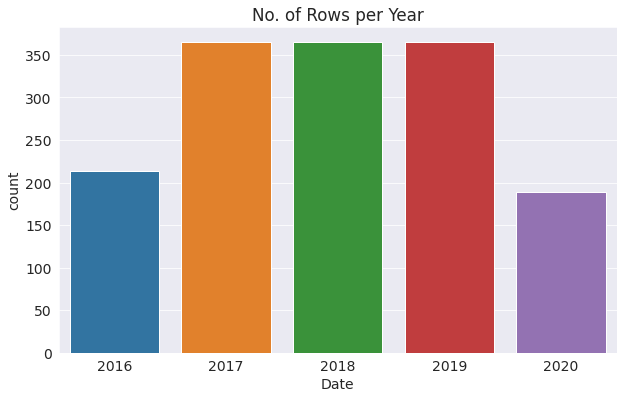

In [55]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(df.Date).dt.year);

In [56]:
'''
year = pd.to_datetime(df.Date).dt.year
month = pd.to_datetime(df.Date).dt.month

train_df = df[year < 2020]
test_df = df[year >= 2020]
'''

train_df = df[:1120]
test_df = df[1120:]

In [57]:
print('train_df.shape :', train_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (1120, 25)
test_df.shape : (378, 25)


In [58]:
train_df

,Date,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week,kWh_usage,tags,tags_COVID_lockdown,tags_vacation,tags_weekday,tags_weekend
0,2016-06-01,1,0.761194,0.756410,0.765625,0.861538,0.873874,0.823529,1.00,0.846491,0.609756,0.454545,0.354260,0.000000,0.272727,0.555556,0.973770,0.000000,2,29.691,weekday,0.0,0.0,1.0,0.0
1,2016-06-02,2,0.626866,0.698718,0.734375,0.861538,0.857357,0.823529,1.00,0.954678,0.902439,0.363636,0.278027,0.000000,0.272727,0.555556,0.973770,0.322413,5,28.789,weekend,0.0,0.0,0.0,1.0
2,2016-06-03,3,0.671642,0.713141,0.765625,0.830769,0.852853,0.852941,1.00,0.907895,0.695122,0.363636,0.139013,0.000000,0.272727,0.555556,0.973770,0.236783,6,19.247,weekend,0.0,0.0,0.0,1.0
3,2016-06-04,4,0.626866,0.698718,0.781250,0.846154,0.852853,0.823529,1.00,0.944444,0.853659,0.424242,0.242152,0.000000,0.272727,0.500000,0.973770,0.176471,2,22.883,weekday,0.0,0.0,1.0,0.0
4,2016-06-05,5,0.716418,0.740385,0.765625,0.830769,0.852853,0.852941,1.00,0.836257,0.573171,0.333333,0.273543,0.000000,0.181818,0.500000,0.973770,0.029039,4,25.195,weekday,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,2019-06-21,21,0.880597,0.947115,0.984375,0.969231,0.992492,0.985294,0.88,0.701754,0.536585,0.363636,0.466368,0.411765,0.272727,0.555556,0.973770,0.000000,4,35.057,weekday,0.0,0.0,1.0,0.0
1116,2019-06-22,22,0.880597,0.943910,1.000000,1.000000,1.000000,1.000000,0.82,0.719298,0.585366,0.424242,0.470852,0.411765,0.363636,0.555556,0.977049,0.000000,5,32.657,weekend,0.0,0.0,0.0,1.0
1117,2019-06-23,23,0.880597,0.959936,0.984375,0.969231,0.989489,1.000000,0.78,0.660819,0.621951,0.363636,0.547085,0.529412,0.272727,0.555556,0.973770,0.001489,6,39.292,weekend,0.0,0.0,0.0,1.0
1118,2019-06-24,24,0.805970,0.807692,0.765625,0.953846,0.894895,0.852941,1.00,0.785088,0.560976,0.575758,0.372197,0.000000,0.363636,0.555556,0.973770,0.065525,0,25.443,weekday,0.0,0.0,1.0,0.0


In [59]:
test_df

,Date,Day,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,day_of_week,kWh_usage,tags,tags_COVID_lockdown,tags_vacation,tags_weekday,tags_weekend
1120,2019-06-26,26,0.776119,0.838141,0.843750,0.969231,0.950450,0.911765,1.00,0.849415,0.719512,0.272727,0.273543,0.0,0.454545,0.666667,0.980328,0.022338,2,19.820,weekday,0.0,0.0,1.0,0.0
1121,2019-06-27,27,0.835821,0.833333,0.875000,0.969231,0.939940,0.852941,1.00,0.842105,0.646341,0.181818,0.107623,0.0,0.545455,0.666667,0.983607,0.001489,3,23.248,weekday,0.0,0.0,1.0,0.0
1122,2019-06-28,28,0.865672,0.815705,0.812500,0.923077,0.900901,0.808824,1.00,0.792398,0.487805,0.545455,0.121076,0.0,0.454545,0.666667,0.980328,0.005957,4,27.491,weekday,0.0,0.0,1.0,0.0
1123,2019-06-29,29,0.805970,0.774038,0.812500,0.923077,0.897898,0.838235,1.00,0.880117,0.609756,0.484848,0.219731,0.0,0.454545,0.611111,0.980328,0.028295,5,27.734,weekend,0.0,0.0,0.0,1.0
1124,2019-06-30,30,0.776119,0.806090,0.812500,0.861538,0.879880,0.852941,1.00,0.750000,0.487805,0.090909,0.080717,0.0,0.454545,0.611111,0.977049,0.059568,6,30.857,weekend,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,2020-07-03,3,0.925373,0.915064,0.859375,0.892308,0.894895,0.838235,0.82,0.557018,0.280488,0.545455,0.210762,0.0,0.363636,0.611111,0.977049,0.000000,5,39.659,COVID_lockdown,1.0,0.0,0.0,0.0
1494,2020-07-04,4,0.940299,0.913462,0.843750,0.892308,0.896396,0.882353,0.88,0.570175,0.341463,0.121212,0.089686,0.0,0.363636,0.555556,0.973770,0.000000,1,38.071,COVID_lockdown,1.0,0.0,0.0,0.0
1495,2020-07-05,5,0.910448,0.926282,0.937500,0.876923,0.905405,0.852941,0.76,0.548246,0.353659,0.181818,0.206278,0.0,0.272727,0.500000,0.973770,0.000000,3,36.565,COVID_lockdown,1.0,0.0,0.0,0.0
1496,2020-07-06,6,0.850746,0.927885,0.984375,0.907692,0.935435,0.911765,0.64,0.590643,0.536585,0.121212,0.197309,0.0,0.272727,0.555556,0.973770,0.000000,6,39.900,COVID_lockdown,1.0,0.0,0.0,0.0


In [60]:
input_cols = numeric_cols + encoded_cols
target_col = 'kWh_usage'

In [61]:
print(input_cols)

['Temp_max', 'Temp_avg', 'Temp_min', 'Dew_max', 'Dew_avg', 'Dew_min', 'Hum_max', 'Hum_avg', 'Hum_min', 'Wind_max', 'Wind_avg', 'Wind_min', 'Press_max', 'Press_avg', 'Press_min', 'Precipit', 'tags_COVID_lockdown', 'tags_vacation', 'tags_weekday', 'tags_weekend']


In [62]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [63]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [64]:
train_inputs

,Temp_max,Temp_avg,Temp_min,Dew_max,Dew_avg,Dew_min,Hum_max,Hum_avg,Hum_min,Wind_max,Wind_avg,Wind_min,Press_max,Press_avg,Press_min,Precipit,tags_COVID_lockdown,tags_vacation,tags_weekday,tags_weekend
0,0.761194,0.756410,0.765625,0.861538,0.873874,0.823529,1.00,0.846491,0.609756,0.454545,0.354260,0.000000,0.272727,0.555556,0.973770,0.000000,0.0,0.0,1.0,0.0
1,0.626866,0.698718,0.734375,0.861538,0.857357,0.823529,1.00,0.954678,0.902439,0.363636,0.278027,0.000000,0.272727,0.555556,0.973770,0.322413,0.0,0.0,0.0,1.0
2,0.671642,0.713141,0.765625,0.830769,0.852853,0.852941,1.00,0.907895,0.695122,0.363636,0.139013,0.000000,0.272727,0.555556,0.973770,0.236783,0.0,0.0,0.0,1.0
3,0.626866,0.698718,0.781250,0.846154,0.852853,0.823529,1.00,0.944444,0.853659,0.424242,0.242152,0.000000,0.272727,0.500000,0.973770,0.176471,0.0,0.0,1.0,0.0
4,0.716418,0.740385,0.765625,0.830769,0.852853,0.852941,1.00,0.836257,0.573171,0.333333,0.273543,0.000000,0.181818,0.500000,0.973770,0.029039,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,0.880597,0.947115,0.984375,0.969231,0.992492,0.985294,0.88,0.701754,0.536585,0.363636,0.466368,0.411765,0.272727,0.555556,0.973770,0.000000,0.0,0.0,1.0,0.0
1116,0.880597,0.943910,1.000000,1.000000,1.000000,1.000000,0.82,0.719298,0.585366,0.424242,0.470852,0.411765,0.363636,0.555556,0.977049,0.000000,0.0,0.0,0.0,1.0
1117,0.880597,0.959936,0.984375,0.969231,0.989489,1.000000,0.78,0.660819,0.621951,0.363636,0.547085,0.529412,0.272727,0.555556,0.973770,0.001489,0.0,0.0,0.0,1.0
1118,0.805970,0.807692,0.765625,0.953846,0.894895,0.852941,1.00,0.785088,0.560976,0.575758,0.372197,0.000000,0.363636,0.555556,0.973770,0.065525,0.0,0.0,1.0,0.0


In [65]:
train_targets

0       29.691
1       28.789
2       19.247
3       22.883
4       25.195
         ...  
1115    35.057
1116    32.657
1117    39.292
1118    25.443
1119    18.369
Name: kWh_usage, Length: 1120, dtype: float64

# File Backup

In [66]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (1120, 20)
train_targets: (1120,)
test_inputs: (378, 20)
test_targets: (378,)


In [67]:
!pip install pyarrow --quiet

In [68]:
%%time
train_inputs.to_parquet('train_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

CPU times: user 41.8 ms, sys: 4.42 ms, total: 46.2 ms
Wall time: 49.7 ms


In [69]:
#to verify if parquet files are generated correctly
train_inputs = pd.read_parquet('train_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')[target_col]
test_targets = pd.read_parquet('test_targets.parquet')[target_col]

In [70]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (1120, 20)
train_targets: (1120,)
test_inputs: (378, 20)
test_targets: (378,)


# Model 1 - LinearRegression()

In [71]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [72]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [73]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (1120, 20)
train_targets: (1120,)
test_inputs: (378, 20)
test_targets: (378,)


In [74]:
model1.fit(train_inputs, train_targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
train_preds = model1.predict(train_inputs)

In [76]:
rmse(train_targets, train_preds)

8.478925770621876

In [77]:
model1.coef_

array([ 1.44173720e+01, -9.81669381e+01,  3.24637386e+01,  4.97001062e+00,
        1.00787143e+02,  5.01013731e+00,  9.15344355e+00, -6.59597323e+01,
        4.56322507e+00,  7.31223185e+00, -2.09126431e+01,  6.90150773e+00,
        5.37507717e+00,  1.31691398e+01, -2.64288399e+01,  2.26024537e+00,
       -3.55271368e-14, -7.42179510e+00,  3.00869014e+00,  4.41310496e+00])

In [78]:
model1.intercept_

24.57915888194894

In [79]:
from sklearn.metrics import r2_score

In [80]:
r2_score(train_targets, train_preds)

0.5662806781636898

In [81]:
test_preds = model1.predict(test_inputs)

In [82]:
rmse(test_targets, test_preds)

6.471372771412258

In [83]:
r2_score(test_targets, test_preds)

0.7014426638834597

# Model 2 - SGDRegressor()

In [84]:
from sklearn.linear_model import SGDRegressor
model2 = SGDRegressor()

In [85]:
model2.fit(train_inputs, train_targets)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [86]:
train_preds = model2.predict(train_inputs)

In [87]:
rmse(train_targets, train_preds)

8.728127301840091

In [88]:
model2.coef_

array([ 8.02469333,  8.95133718, 10.84755299,  4.51280194,  6.36551556,
        9.41418749, -3.3644003 , -6.36035519, -5.4357329 , -2.2663622 ,
       -5.56423615, -0.12681162,  2.64196543,  1.74728785, -2.40038408,
       -0.65057715,  0.        , -7.24423499,  1.94013731,  3.16103125])

In [89]:
model2.intercept_

array([-2.14726506])

In [90]:
test_preds = model2.predict(test_inputs)
rmse(test_targets, test_preds)

6.591131647818308

In [91]:
r2_score(test_targets, test_preds)

0.6902902449341564

# Model Backup

In [92]:
import joblib

In [93]:
Model1 = {
    'model': model1,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [94]:
joblib.dump(Model1, "Model1.joblib")

['Model1.joblib']

In [95]:
Model2 = {
    'model': model2,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [96]:
joblib.dump(Model2, "Model2.joblib")

['Model2.joblib']

# Helper Functions

When the input is in form of a Pandas Series:

In [97]:
def list_predict(inputs, targets):
    preds = model1.predict(inputs) #use model1 or model2 here
    accuracy = r2_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    return preds

In [98]:
test_preds = list_predict(test_inputs, test_targets)

Accuracy: 70.14%


For a single input:

In [99]:
def single_predict(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model1.predict(X_input)[0]
    return pred

In [100]:
new_input = {
    'Date': '2021-08-18',
    'Day': 3,
    'Temp_max': 32,
    'Temp_avg': 30,
    'Temp_min': 26,
    'Dew_max': 27,
    'Dew_avg': 26,
    'Dew_min': 24,
    'Hum_max': 93,
    'Hum_avg': 92,
    'Hum_min': 90,
    'Wind_max': 7.3,
    'Wind_avg': 6,
    'Wind_min': 4.2,
    'Press_max': 1003.2,
    'Press_avg': 1003,
    'Press_min': 1003,
    'Precipit': 0,
    'day_of_week': 3,
    'tags': 'Weekday'
}

test_preds = single_predict(new_input)

11012.817770646838
